In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import scipy.stats as st

## Data Explorations

In [3]:
PATH = Path('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge')
list(PATH.iterdir())

[PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.200d.txt'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.zip'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/train.tsv'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/test.tsv'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.100d.txt'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.300d.txt'),
 PosixPath('/data/ssubrahmannian/.kaggle/competitions/mercari-price-suggestion-challenge/glove.6B.50d.txt')]

In [39]:
train_df = pd.read_csv(PATH/'train.tsv',sep = '\t')

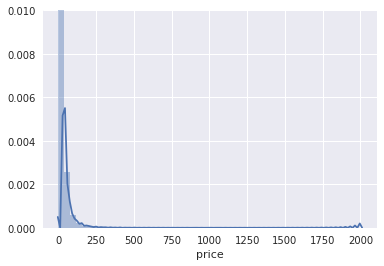

In [24]:
sns.set(color_codes=True)
sns.distplot(train_df['price'])
plt.ylim(0,0.01)
plt.show()

## Data Sanity Checks

In [6]:
## Missing values 
train_df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [44]:
train_df['price'].describe().astype('int')

count    1482535
mean          26
std           38
min            0
25%           10
50%           17
75%           29
max         2009
Name: price, dtype: int64

In [49]:
np.percentile(train_df['price'],99)

170.0

In [50]:
train_df[train_df['price']>170].shape

(14741, 8)

In [14]:
train_df[train_df.price==0].shape

(874, 8)

In [15]:
train_df[train_df.price==0].head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
1325,1325,Alabama Crimson Tide Quality Lanyard,1,Sports & Outdoors/Fan Shop/NCAA,NaN,0.0,1,TOP QUALITY THICK LANYARD Reversible sides wit...
2544,2544,Levi leggings,3,"Women/Jeans/Slim, Skinny",Levi's®,0.0,0,Light wash. Hardly worn. Size 24 but fits like...
2712,2712,Simple Red Lace Lingerie Top,3,Women/Underwear/G-Strings & Thongs,NaN,0.0,0,"Very simple but cute, a little form fitting as..."
3576,3576,Turquoise 15 Pc Makeup Brush Set,1,Beauty/Tools & Accessories/Makeup Brushes & Tools,NaN,0.0,1,1 left!
3761,3761,Girls size 7/8,3,Kids/Girls (4+)/Tops & T-Shirts,NaN,0.0,1,5 pair gap jean excellent used condition 3 chi...


In [16]:
train_df['price'] = train_df['price'].apply(lambda x: x+1)

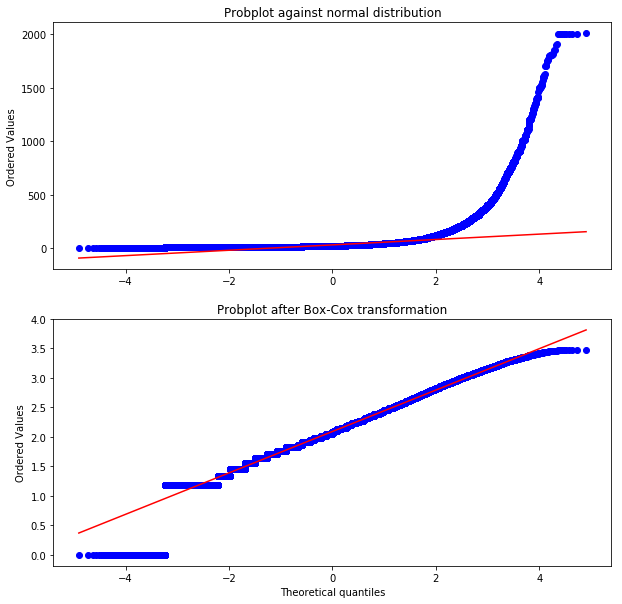

In [17]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
prob = st.probplot(train_df.price.values, dist=st.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, box_cox_lambda = st.boxcox(train_df.price.values)
prob = st.probplot(xt, dist=st.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [53]:
train_df = train_df[train_df['price']>1]
train_df.reset_index(inplace=True,drop=True)

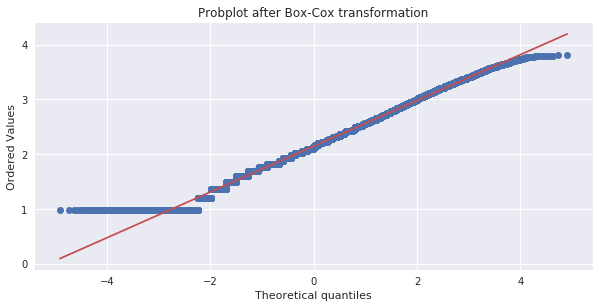

In [54]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
prob = st.probplot(train_df.price.values, dist=st.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
ax2 = fig.add_subplot(212)
xt, box_cox_lambda = st.boxcox(train_df.price.values)
prob = st.probplot(xt, dist=st.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

In [25]:
box_cox_lambda

-0.28222943830344566

In [56]:
train_df.price = np.log1p(train_df.price)

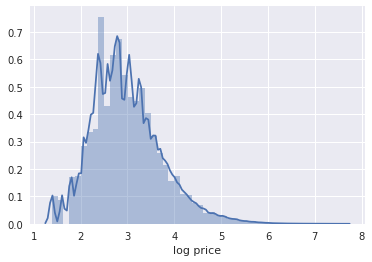

In [60]:
sns.set(color_codes=True)
sns.distplot(train_df['price'],axlabel='log price')
plt.show()

In [26]:
train_df.brand_name.nunique()

4809

In [27]:
train_df.category_name.nunique()

1287